In [84]:
import pandas as pd
import numpy as np

In [85]:
data = pd.read_csv('data/ascc.csv', index_col='PUF_CASE_ID')
hpv_cols = [col for col in data.columns if 'hiv' in col.lower()]
hpv_cols

/home/kchen/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (164,167,170,173,176,179,190,193,200,203,219,220,245,246,266,307) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['HIV_STATUS']

In [86]:
data.columns.to_list()

['PUF_FACILITY_ID',
 'FACILITY_TYPE_CD',
 'FACILITY_LOCATION_CD',
 'AGE',
 'SEX',
 'RACE',
 'SPANISH_HISPANIC_ORIGIN',
 'INSURANCE_STATUS',
 'MED_INC_QUAR_00',
 'NO_HSD_QUAR_00',
 'UR_CD_03',
 'MED_INC_QUAR_12',
 'NO_HSD_QUAR_12',
 'UR_CD_13',
 'CROWFLY',
 'CDCC_TOTAL_BEST',
 'SEQUENCE_NUMBER',
 'CLASS_OF_CASE',
 'YEAR_OF_DIAGNOSIS',
 'PRIMARY_SITE',
 'LATERALITY',
 'HISTOLOGY',
 'BEHAVIOR',
 'GRADE',
 'DIAGNOSTIC_CONFIRMATION',
 'TUMOR_SIZE',
 'REGIONAL_NODES_POSITIVE',
 'REGIONAL_NODES_EXAMINED',
 'DX_STAGING_PROC_DAYS',
 'RX_SUMM_DXSTG_PROC',
 'TNM_CLIN_T',
 'TNM_CLIN_N',
 'TNM_CLIN_M',
 'TNM_CLIN_STAGE_GROUP',
 'TNM_PATH_T',
 'TNM_PATH_N',
 'TNM_PATH_M',
 'TNM_PATH_STAGE_GROUP',
 'TNM_EDITION_NUMBER',
 'ANALYTIC_STAGE_GROUP',
 'CS_METS_AT_DX',
 'CS_METS_EVAL',
 'CS_EXTENSION',
 'CS_TUMOR_SIZEEXT_EVAL',
 'CS_METS_DX_BONE',
 'CS_METS_DX_BRAIN',
 'CS_METS_DX_LIVER',
 'CS_METS_DX_LUNG',
 'LYMPH_VASCULAR_INVASION',
 'CS_SITESPECIFIC_FACTOR_1',
 'CS_SITESPECIFIC_FACTOR_2',
 'CS_SITESPECI

In [87]:
id_cols = ['PUF_CASE_ID', 'YEAR_OF_DIAGNOSIS', 'CLASS_OF_CASE']

fac_cols = [ 'PUF_FACILITY_ID', 'FACILITY_TYPE_CD', 'FACILITY_LOCATION_CD']

dem_cols = ['AGE', 'SEX', 'RACE', 'SPANISH_HISPANIC_ORIGIN']

ses_cols = ['INSURANCE_STATUS', 'UR_CD_13', 'CROWFLY', 'NO_HSD_QUAR_2016', 'MED_INC_QUAR_2016', 'PUF_MEDICAID_EXPN_CODE']
 
medco_cols = ['CDCC_TOTAL_BEST']

tumor_cols = ['HISTOLOGY', 'GRADE', 'GRADE_CLIN', 'TUMOR_SIZE', 'TUMOR_SIZE_SUMMARY_2016', 'TNM_CLIN_T', 'TNM_CLIN_N', 'TNM_CLIN_M', 'TNM_CLIN_STAGE_GROUP', 'TNM_PATH_T', 'TNM_PATH_N', 'TNM_PATH_M', 'TNM_PATH_STAGE_GROUP', 'AJCC_TNM_CLIN_T', 'AJCC_TNM_CLIN_N', 'AJCC_TNM_CLIN_M', 'AJCC_TNM_CLIN_STG_GRP', 'AJCC_TNM_PATH_T', 'AJCC_TNM_PATH_N', 'AJCC_TNM_PATH_M', 'AJCC_TNM_PATH_STG_GRP', 'AJCC_TNM_POST_PATH_T',  'AJCC_TNM_POST_PATH_N', 'AJCC_TNM_POST_PATH_M', 'AJCC_TNM_POST_PATH_STG_GRP', 'LYMPH_VASCULAR_INVASION',]

rad_cols = ['RAD_LOCATION_OF_RX','DX_RAD_STARTED_DAYS', 'RAD_ELAPSED_RX_DAYS', 'REASON_FOR_NO_RADIATION', 'TOTAL_DOSE',]

chemo_cols = ['RX_SUMM_CHEMO', 'DX_CHEMO_STARTED_DAYS', 'RX_SUMM_SYSTEMIC_SUR_SEQ']

surg_cols = ['RX_SUMM_SURGRAD_SEQ', 'PALLIATIVE_CARE', 'DX_SURG_STARTED_DAYS', 'RX_SUMM_SURG_PRIM_SITE', 'RX_SUMM_SURGICAL_MARGINS','SURG_DISCHARGE_DAYS', 'READM_HOSP_30_DAYS', 'REASON_FOR_NO_SURGERY', ]

os_cols = ['DX_LASTCONTACT_DEATH_MONTHS', 'PUF_VITAL_STATUS',]
 
incl = id_cols + fac_cols + dem_cols + ses_cols + medco_cols + tumor_cols + rad_cols + chemo_cols + surg_cols + os_cols

In [88]:
len(incl)

61

In [89]:
data = pd.read_csv('data/ascc.csv', usecols=incl, na_values=[999, 99, 999999], low_memory=False, index_col='PUF_CASE_ID')
data.shape

(85027, 60)

In [90]:
print(data.shape)
data = data[data['CLASS_OF_CASE'] != 0]
print(data.shape)
data.drop(columns=['CLASS_OF_CASE'], inplace=True)

(85027, 60)
(80128, 60)


In [91]:

#define a function that returns value counts and value percentages for a given column
def table(df, col):
    return pd.concat([df[col].value_counts(), df[col].value_counts(normalize=True)], axis=1, keys=('counts', 'percent'))
def perc_APR(df):
    return table(df, 'APR')['percent'][1]
#create a dataframe with the counts and percentages of a variable by year
def by_year(df, col):
    cts = pd.crosstab(df['YEAR_OF_DIAGNOSIS'], df[col])
    percs = pd.crosstab(df['YEAR_OF_DIAGNOSIS'], df[col], normalize='index')
    percs = percs.round(2) * 100
    percs = percs.astype(str)
    cts = cts.astype(str)
    comb = cts + ' (' + percs + '%)'
    comb['total'] = df['YEAR_OF_DIAGNOSIS'].value_counts().sort_index()
    return comb
def by_stage(df, col):
    cts = pd.crosstab(df['stage'], df[col])
    percs = pd.crosstab(df['stage'], df[col], normalize='index')
    percs = percs.round(2) * 100
    percs = percs.astype(str)
    cts = cts.astype(str)
    comb = cts + ' (' + percs + '%)'
    comb['total'] = df['stage'].value_counts().sort_index()
    return comb

In [92]:
data['REASON_FOR_NO_SURGERY'].value_counts()

1    42095
0    34607
2      945
9      836
7      653
8      527
6      374
5       91
Name: REASON_FOR_NO_SURGERY, dtype: int64

In [93]:
data['APR'] = np.NaN
data.loc[data['RX_SUMM_SURG_PRIM_SITE'] == 60, 'APR'] = 1
data.loc[data['RX_SUMM_SURG_PRIM_SITE'] == 61, 'APR'] = 1
data.loc[data['RX_SUMM_SURG_PRIM_SITE'] == 62, 'APR'] = 1
data.loc[data['RX_SUMM_SURG_PRIM_SITE'] == 63, 'APR'] = 1

data.loc[(
            (data['REASON_FOR_NO_SURGERY'] == 1) &
            (data['RX_SUMM_SURG_PRIM_SITE'] == 0) & 
            (data['PALLIATIVE_CARE'] == 0) &
            # (data['DX_LASTCONTACT_DEATH_MONTHS'] >= 36) &
            (data['RX_SUMM_SURGRAD_SEQ'] == 0)
            ), 'APR'] = 0
data['APR'].value_counts(dropna=False)

0.0    39630
NaN    35296
1.0     5202
Name: APR, dtype: int64

In [94]:
histo_tsikitis = [8000, 8010, 8083, 8120, 8124, 8560, 8070, 8071, 8072, 8076, 8083, 8481, 8051, 8123]

In [95]:
#create a list of numbers between 8070 and 8078
histo_list = []
for i in range(8070, 8079):
    histo_list.append(i)
#add the codes in histo_tiskitis to the list, unless they are already in the list
for x in histo_tsikitis:
    if x not in histo_list:
        histo_list.append(x)

In [96]:
drop_counts = pd.DataFrame(columns=['criteria', 'before', 'after', 'drop', '% APR'])
drop_counts.head()

,criteria,before,after,drop,% APR


In [97]:
drop_counts = drop_counts.append({'criteria': 'total', 'before': 0, 'after': data.shape[0], 'drop': 0, '% APR': table(data, 'APR')['percent'][1]}, ignore_index=True)

In [98]:
#keep only histologies in the list
before = data.shape[0]
data = data[data['HISTOLOGY'].isin(histo_list)]
after = data.shape[0]
drop = before - after
drop_counts = drop_counts.append({'criteria': 'histology', 'before': before, 'after': after, 'drop': drop, '% APR': table(data, 'APR')['percent'][1]}, ignore_index=True)
drop_counts.head()

,criteria,before,after,drop,% APR
0,total,0,80128,0,0.116033
1,histology,80128,70610,9518,0.063928


In [99]:
before = data.shape[0]
data = data[data['REASON_FOR_NO_RADIATION'] == 0]
after = data.shape[0]
data.drop(columns=['REASON_FOR_NO_RADIATION'], inplace=True)
drop = before - after
drop_counts = drop_counts.append({'criteria': 'no radiation', 'before': before, 'after': after, 'drop': drop, '% APR': perc_APR(data)}, ignore_index=True)
drop_counts.head()

,criteria,before,after,drop,% APR
0,total,0,80128,0,0.116033
1,histology,80128,70610,9518,0.063928
2,no radiation,70610,51796,18814,0.039923


In [100]:
data['TOTAL_DOSE'].describe()

count     23462.000000
mean       7244.643253
std       54440.472918
min           0.000000
25%           0.000000
50%        5040.000000
75%        5400.000000
max      999998.000000
Name: TOTAL_DOSE, dtype: float64

<AxesSubplot:>

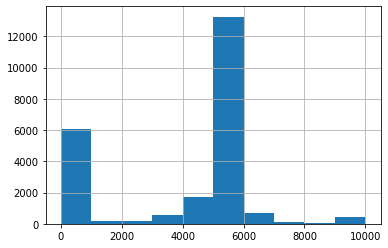

In [101]:
data.loc[data['TOTAL_DOSE'] > 20000, 'TOTAL_DOSE'] = np.NaN
data.loc[data['TOTAL_DOSE'] > 10000, 'TOTAL_DOSE'] = 10000
data['TOTAL_DOSE'].hist()

In [102]:
data['stage'] = np.NaN

In [103]:
#if YEAR_OF_DIAGNOSIS is < 2018, stage is 'AJCC Clinical Stage Group'
data['stage'] = data['AJCC_TNM_CLIN_STG_GRP']
data.loc[data['YEAR_OF_DIAGNOSIS'] < 2018, 'stage'] = data.loc[data['YEAR_OF_DIAGNOSIS'] < 2018, 'TNM_CLIN_STAGE_GROUP']
#if 'stage' is still NaN, then fill with 'AJCC Clinical Stage Group'
data.loc[data['stage'].isnull(), 'stage'] = data.loc[data['stage'].isnull(), 'TNM_CLIN_STAGE_GROUP']
#find rows where 'stage' does not equal 'TNM_CLIN_STAGE_GROUP' and show only those columns
data.loc[(data['stage'] != data['TNM_CLIN_STAGE_GROUP']) & (data['stage'].notnull() & (data['TNM_CLIN_STAGE_GROUP'].notnull())), ['stage', 'TNM_CLIN_STAGE_GROUP']]
#find rows where 'stage' does not equal 'TNM_CLIN_STAGE_GROUP' and show only those columns
data.loc[(data['stage'] != data['TNM_CLIN_STAGE_GROUP']) & (data['stage'].notnull() & (data['TNM_CLIN_STAGE_GROUP'].notnull())), ['stage', 'TNM_CLIN_STAGE_GROUP']]

data['t_stage'] = data['TNM_CLIN_T']
data['n_stage'] = data['TNM_CLIN_N']
data['m_stage'] = data['TNM_CLIN_M']

data['t_stage'].value_counts(dropna=False)
#if YEAR_OF_DIAGNOSIS is >= 2018 and t_stage is null, T stage is 'AJCC_TNM_CLIN_T'
data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['t_stage'].isnull())), 't_stage'] = data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['t_stage'].isnull())), 'AJCC_TNM_CLIN_T']

#same for n and m stages
data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['n_stage'].isnull())), 'n_stage'] = data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['n_stage'].isnull())), 'AJCC_TNM_CLIN_N']
data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['m_stage'].isnull())), 'm_stage'] = data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['m_stage'].isnull())), 'AJCC_TNM_CLIN_M']
data['t_stage'].value_counts(dropna=False)
#if t_stage contains 'is' or 'x', t_stage is 0
data.loc[data['t_stage'].str.contains('is', na=False), 't_stage'] = 0
data.loc[data['t_stage'].str.contains('x', case=False, na=False), 't_stage'] = np.NaN
data.loc[data['t_stage'].str.contains('1', case=False, na=False), 't_stage'] = 1
data.loc[data['t_stage'].str.contains('2', case=False, na=False), 't_stage'] = 2
data.loc[data['t_stage'].str.contains('3', case=False, na=False), 't_stage'] = 3
data.loc[data['t_stage'].str.contains('4', case=False, na=False), 't_stage'] = 4
data.loc[data['t_stage'].str.contains('is', case=False, na=False), 't_stage'] = 0
data.loc[data['t_stage'].str.contains('0', case=False, na=False), 't_stage'] = 0
# data['t_stage'].fillna(0, inplace=True)
data['t_stage'].value_counts(dropna=False)
data['n_stage'].value_counts(dropna=False)
data.loc[data['n_stage'].str.contains('is', case=False, na=False), 'n_stage'] = 0
data.loc[data['n_stage'].str.contains('0', case=False, na=False), 'n_stage'] = 0
# data['n_stage'].fillna(0, inplace=True)
data.loc[data['n_stage'].str.contains('1', case=False, na=False), 'n_stage'] = 1
data.loc[data['n_stage'].str.contains('2', case=False, na=False), 'n_stage'] = 1
data.loc[data['n_stage'].str.contains('3', case=False, na=False), 'n_stage'] = 1
data.loc[data['n_stage'].str.contains('4', case=False, na=False), 'n_stage'] = 1
data.loc[data['n_stage'].str.contains('X', case=False, na=False), 'n_stage'] = np.NaN
data['n_stage'].value_counts(dropna=False)
data['m_stage'].value_counts(dropna=False)
data['m_stage'].fillna(0, inplace=True)
data.loc[data['m_stage'].str.contains('is', case=False, na=False), 'm_stage'] = 0
data.loc[data['m_stage'].str.contains('0', case=False, na=False), 'm_stage'] = 0
data.loc[data['m_stage'].str.contains('1', case=False, na=False), 'm_stage'] = 1
data.loc[data['m_stage'].str.contains('88', case=False, na=False), 'm_stage'] = 0
data.loc[data['m_stage'].str.contains('x', case=False, na=False), 'm_stage'] = 0
data['m_stage'].value_counts(dropna=False)
before = data.shape[0]
data.loc[data['m_stage'] == 1, 'stage'] = 4
data = data.loc[data['m_stage'] == 0]
data = data.loc[data['stage'] != 4]
data = data.loc[data['stage'] != '4']
after = data.shape[0]
drop = before - after

drop_counts = drop_counts.append({'criteria': 'stage IV', 'before': before, 'after': after, 'drop': drop, '% APR': perc_APR(data)}, ignore_index=True)
drop_counts.head()

,criteria,before,after,drop,% APR
0,total,0,80128,0,0.116033
1,histology,80128,70610,9518,0.063928
2,no radiation,70610,51796,18814,0.039923
3,stage IV,51796,49284,2512,0.040543


In [104]:
data.loc[data['AJCC_TNM_CLIN_N'].str.contains('cN1', case=False, na=False), 'stage'] = '3'
data.loc[data['TNM_CLIN_N'].str.contains('cN1', case=False, na=False), 'stage'] = '3'

In [105]:
# data.loc[data['stage'] == '<NA>', 'stage'] = np.NaN
before = data.shape[0]
data = data[data['stage'] != '0']
after = data.shape[0]
drop = before - after

drop_counts = drop_counts.append({'criteria': 'stage 0', 'before': before, 'after': after, 'drop': drop, '% APR': perc_APR(data)}, ignore_index=True)
drop_counts.head()

,criteria,before,after,drop,% APR
0,total,0,80128,0,0.116033
1,histology,80128,70610,9518,0.063928
2,no radiation,70610,51796,18814,0.039923
3,stage IV,51796,49284,2512,0.040543
4,stage 0,49284,48640,644,0.040459


In [106]:
data.loc[data['stage'] == 3, 'stage'] = '3'
#if the stage is 2 and t_stage is null, t_stage is 2
data.loc[(data['stage'] == '2') & (data['t_stage'].isna()), 't_stage'] = 2

#if the stage is 3 and t_stage is null, t_stage is 1
data.loc[(data['stage'] == '3') & (data['t_stage'].isna()), 't_stage'] = 1
#if the stage is 3 and n_stage is null, n_stage is 1
data.loc[(data['stage'] == '3') & (data['n_stage'].isna()) & (data['t_stage'] != 4), 'n_stage'] = 1


data.loc[(data['t_stage'] == 1) & (data['n_stage'] == 0), 'stage'] = '1'
data.loc[(data['t_stage'] == 2) & (data['n_stage'] == 0), 'stage'] = '2A'
data.loc[(data['t_stage'] == 2) & (data['n_stage'].isna()), 'stage'] = '2A'

data.loc[(data['t_stage'] == 3) & (data['n_stage'] == 0), 'stage'] = '2B'
data.loc[(data['t_stage'] == 3) & (data['n_stage'].isna()), 'stage'] = '2B'
data.loc[(data['t_stage'] == 0) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['t_stage'] == 1) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['t_stage'] == 2) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['t_stage'] == 4) & (data['n_stage'] == 0), 'stage'] = '3B'
data.loc[(data['t_stage'] == 3) & (data['n_stage'] == 1), 'stage'] = '3C'
data.loc[(data['t_stage'] == 4) & (data['n_stage'] == 1), 'stage'] = '3C'

data.loc[(data['stage'] == '2') & (data['n_stage'] == 0) & (data['t_stage'] == 0), 'stage'] = '2A'
data.loc[data['stage'] == 2, 'stage'] = '2A'
data.loc[(data['stage'] == '3') & (data['n_stage'] == 0) & (data['t_stage'] == 0), 'stage'] = '3A'
data.loc[data['stage'] == 3, 'stage'] = '3A'
data['stage'].value_counts(dropna=False)

2A     14397
3A      7793
3C      7530
1       6787
NaN     5555
2B      4529
3B      2006
88        35
2          4
3          4
Name: stage, dtype: int64

In [107]:
data.loc[(data['stage'] == '2')]['t_stage'].value_counts(dropna=False)

1    3
4    1
Name: t_stage, dtype: int64

In [108]:
data.loc[(data['stage'] == '2')]['n_stage'].value_counts(dropna=False)

NaN    4
Name: n_stage, dtype: int64

In [109]:
data.loc[(data['stage'] == '2') & (data['n_stage'].isna()) & (data['t_stage'] == 1), 'stage'] = '1'
data.loc[(data['stage'] == '2') & (data['n_stage'].isna()) & (data['t_stage'] == 4), 'stage'] = '3B'
data['stage'].value_counts(dropna=False)

2A     14397
3A      7793
3C      7530
1       6790
NaN     5555
2B      4529
3B      2007
88        35
3          4
Name: stage, dtype: int64

In [110]:
data.loc[(data['stage'] == '3')]['t_stage'].value_counts(dropna=False)

4    4
Name: t_stage, dtype: int64

In [111]:
data.loc[(data['stage'] == '3')]['n_stage'].value_counts(dropna=False)

NaN    4
Name: n_stage, dtype: int64

In [112]:
data.loc[(data['stage'] == '3') & (data['n_stage'].isna()) & (data['t_stage'] == 4), 'stage'] = '3B'
data['stage'].value_counts(dropna=False)

2A     14397
3A      7793
3C      7530
1       6790
NaN     5555
2B      4529
3B      2011
88        35
Name: stage, dtype: int64

In [113]:

data.loc[data['stage'] == '<NA>', 'stage'] = np.NaN
before = data.shape[0]
data.loc[data['stage'] == '88', 'stage'] = np.NaN
data = data.dropna(subset=['stage'])

after = data.shape[0]
drop = before - after

drop_counts = drop_counts.append({'criteria': 'stage missing', 'before': before, 'after': after, 'drop': drop, '% APR': perc_APR(data)}, ignore_index=True)
drop_counts.head(10)

,criteria,before,after,drop,% APR
0,total,0,80128,0,0.116033
1,histology,80128,70610,9518,0.063928
2,no radiation,70610,51796,18814,0.039923
3,stage IV,51796,49284,2512,0.040543
4,stage 0,49284,48640,644,0.040459
5,stage missing,48640,43050,5590,0.032337


In [114]:
data['p_stage'] = data['AJCC_TNM_PATH_STG_GRP']
data.loc[data['YEAR_OF_DIAGNOSIS'] < 2018, 'p_stage'] = data.loc[data['YEAR_OF_DIAGNOSIS'] < 2018, 'TNM_PATH_STAGE_GROUP']
data['p_stage'].value_counts(dropna=False)

NaN    38893
2       1608
1       1234
3B       573
3A       439
2A       105
0         80
4         41
3C        34
2B        22
3         21
Name: p_stage, dtype: int64

In [115]:
data.loc[data['p_stage'].isnull(), 'p_stage'] = data.loc[data['p_stage'].isnull(), 'AJCC_TNM_POST_PATH_STG_GRP']
data['p_stage'].value_counts(dropna=False)

NaN    38788
2       1608
1       1243
3B       596
3A       446
2A       130
0         90
2B        44
4         43
3C        41
3         21
Name: p_stage, dtype: int64

In [116]:
data['p_stage'] = np.NaN
data['p_stage'].fillna(data['AJCC_TNM_PATH_STG_GRP'], inplace=True)
data['p_stage'].fillna(data['AJCC_TNM_PATH_STG_GRP'], inplace=True)
data['p_stage'].value_counts(dropna=False)

NaN    42721
2A       105
1         77
3A        62
3C        34
2B        22
0         17
3B         6
4          6
Name: p_stage, dtype: int64

In [117]:
n_list = ['TNM_PATH_N', 'AJCC_TNM_PATH_N', 'AJCC_TNM_POST_PATH_N']
for col in n_list:
    data.loc[data[col].isnull(), col] = '0'
    data.loc[data[col].str.contains('0', case=False, na=False), col] = '0'
    data.loc[data[col].str.contains('X', case=False, na=False), col] = '0'
    data.loc[data[col].str.contains('1', case=False, na=False), col] = '1'
    data.loc[data[col].str.contains('2', case=False, na=False), col] = '2'
    data.loc[data[col].str.contains('3', case=False, na=False), col] = '3'

In [118]:
n_list = ['TNM_PATH_T', 'AJCC_TNM_PATH_T', 'AJCC_TNM_POST_PATH_T']
for col in n_list:
    data.loc[data[col].str.contains('0', case=False, na=False), col] = '0'
    data.loc[data[col].str.contains('X', case=False, na=False), col] = '0'
    data.loc[data[col].str.contains('1', case=False, na=False), col] = '1'
    data.loc[data[col].str.contains('2', case=False, na=False), col] = '2'
    data.loc[data[col].str.contains('3', case=False, na=False), col] = '3'
    data.loc[data[col].str.contains('4', case=False, na=False), col] = '4'

In [119]:
data.loc[(data['p_stage'].isnull()) & (data['AJCC_TNM_PATH_T'] == '0') & (data['AJCC_TNM_PATH_N'] == '0'), 'p_stage'] = '0'
data.loc[(data['p_stage'].isnull()) & (data['AJCC_TNM_POST_PATH_T'] == '0') & (data['AJCC_TNM_POST_PATH_N'] == '0'), 'p_stage'] = '0'
data.loc[(data['p_stage'].isnull()) & (data['TNM_PATH_T'] == '0') & (data['TNM_PATH_N'] == '0'), 'p_stage'] = '0'
data['p_stage'].value_counts(dropna=False)

NaN    27307
0      15431
2A       105
1         77
3A        62
3C        34
2B        22
3B         6
4          6
Name: p_stage, dtype: int64

In [120]:
data.loc[data['p_stage'].str.contains('0', case=False, na=False), 'p_stage'] = '0'
data.loc[data['p_stage'].str.contains('1', case=False, na=False), 'p_stage'] = '1'
data.loc[data['p_stage'].str.contains('2', case=False, na=False), 'p_stage'] = '2'
data.loc[data['p_stage'].str.contains('3', case=False, na=False), 'p_stage'] = '3'
data.loc[data['p_stage'].str.contains('4', case=False, na=False), 'p_stage'] = '4'

In [121]:
data['p_stage'].value_counts(dropna=False)

NaN    27307
0      15431
2        127
3        102
1         77
4          6
Name: p_stage, dtype: int64

In [122]:
data.loc[data['APR'] == 0, 'p_stage'] = 'No surgery'
data['p_stage'].value_counts(dropna=False)

No surgery    30373
NaN            8953
0              3483
2               102
1                71
3                66
4                 2
Name: p_stage, dtype: int64

In [123]:
data['p_stage'].value_counts(dropna=False)

No surgery    30373
NaN            8953
0              3483
2               102
1                71
3                66
4                 2
Name: p_stage, dtype: int64

In [124]:
tnm_cols = [col for col in data.columns if 'TNM' in col]
data.drop(tnm_cols, axis=1, inplace=True)

<AxesSubplot:>

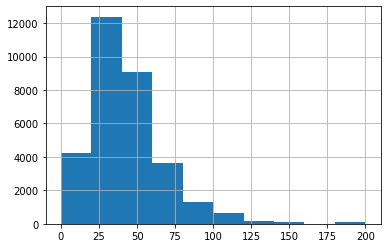

In [125]:
#if TUMOR_SIZE is missing, fill with TUMOR_SIZE_SUMMARY_2016
data.loc[data['TUMOR_SIZE'].isnull(), 'TUMOR_SIZE'] = data.loc[data['TUMOR_SIZE'].isnull(), 'TUMOR_SIZE_SUMMARY_2016']
data.loc[data['TUMOR_SIZE'] > 800, 'TUMOR_SIZE'] = np.NaN
data.loc[data['TUMOR_SIZE'] > 200, 'TUMOR_SIZE'] = 200
data['TUMOR_SIZE'].hist()


In [126]:
data.drop('TUMOR_SIZE_SUMMARY_2016', axis=1, inplace=True)

<AxesSubplot:>

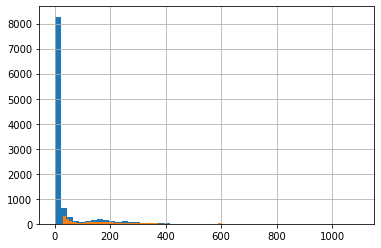

In [127]:
#find the distribution of days between diagnosis and surgery
data['DX_SURG_STARTED_DAYS'].hist(bins=50)
data.loc[data['DX_SURG_STARTED_DAYS'] <30, 'DX_SURG_STARTED_DAYS'] = np.NaN
data.loc[data['DX_SURG_STARTED_DAYS'] > 600, 'DX_SURG_STARTED_DAYS'] = 600

data['DX_SURG_STARTED_DAYS'].hist(bins=50)

<AxesSubplot:>

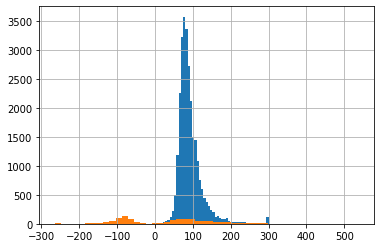

In [128]:
data['rad_end'] = data['RAD_ELAPSED_RX_DAYS'] + data['DX_RAD_STARTED_DAYS']
data.loc[data['rad_end'] > 300, 'rad_end'] = 300
data['rad_end'].hist(bins=50)
data['surg_rad_days'] = data['DX_SURG_STARTED_DAYS'] - data['rad_end']
data['surg_rad_days'].hist(bins=50)


<AxesSubplot:>

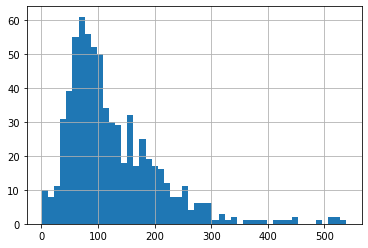

In [129]:
#if 'surg_rad_days' is <0, make it nan
data.loc[data['surg_rad_days'] < 0, 'surg_rad_days'] = np.NaN
data['surg_rad_days'].hist(bins=50)

<AxesSubplot:>

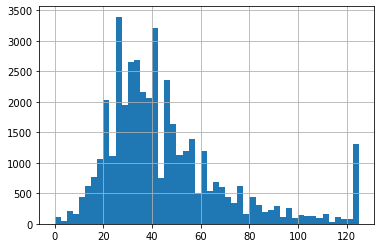

In [130]:
data.loc[data['DX_RAD_STARTED_DAYS'] > 700, 'DX_RAD_STARTED_DAYS'] = np.NaN
data.loc[data['DX_RAD_STARTED_DAYS'] > 125, 'DX_RAD_STARTED_DAYS'] = 125
data['DX_RAD_STARTED_DAYS'].hist(bins=50)

<AxesSubplot:>

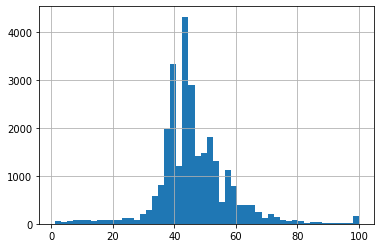

In [131]:
data.loc[data['RAD_ELAPSED_RX_DAYS'] > 700, 'RAD_ELAPSED_RX_DAYS'] = np.NaN
data.loc[data['RAD_ELAPSED_RX_DAYS'] > 100, 'RAD_ELAPSED_RX_DAYS'] = 100
data['RAD_ELAPSED_RX_DAYS'].hist(bins=50)

In [132]:
print(data.shape)
drop_cols = ['DX_SURG_STARTED_DAYS', 'surg_rad_days', 'rad_end', 'RAD_LOCATION_OF_RX', 'REASON_FOR_NO_RADIATION', 'RX_SUMM_SURGRAD_SEQ', 'DX_CHEMO_STARTED_DAYS', 'RX_SUMM_SYSTEMIC_SUR_SEQ', 'PALLIATIVE_CARE']
for x in drop_cols:
    try:
        data.drop(x, axis=1, inplace=True)
    except:
        pass
print(data.shape)

(43050, 45)
(43050, 37)


In [133]:
#find the columns with the greatest proportion of missing values
missing_values = data.isnull().sum()
pd.DataFrame(missing_values.sort_values(ascending=False)).head(12)

,0
GRADE_CLIN,35571
SURG_DISCHARGE_DAYS,34540
TOTAL_DOSE,23232
RAD_ELAPSED_RX_DAYS,15396
APR,11662
LYMPH_VASCULAR_INVASION,11476
TUMOR_SIZE,11450
p_stage,8953
GRADE,7479
MED_INC_QUAR_2016,4917


In [134]:
data['GRADE'] = data['GRADE'].astype(str)
data['GRADE_CLIN'] = data['GRADE_CLIN'].astype(str)
data.loc[data['GRADE'] == 'nan', 'GRADE'] = data.loc[data['GRADE'] == 'nan', 'GRADE_CLIN']
data.loc[data['GRADE'].str.contains('1'), 'GRADE'] = '1.0'
data.loc[data['GRADE'].str.contains('2'), 'GRADE'] = '2.0'
data.loc[data['GRADE'].str.contains('3'), 'GRADE'] = '3.0'
data.loc[data['GRADE'].str.contains('4'), 'GRADE'] = '4.0'
data['GRADE'].value_counts(dropna=False)

2.0    14881
3.0    11110
9.0    10545
1.0     3440
9       2773
4.0      223
H         77
L          1
Name: GRADE, dtype: int64

In [135]:
drop = ['GRADE_CLIN']
data.drop(drop, axis=1, inplace=True)

In [136]:
facility_by_year = pd.DataFrame(pd.crosstab(data['PUF_FACILITY_ID'], data['YEAR_OF_DIAGNOSIS'], margins=True))
facility_counts = pd.DataFrame(facility_by_year['All'])
#drop the last row, which is the total
facility_counts.drop(facility_counts.tail(1).index, inplace=True)

In [137]:
facility_by_year = pd.DataFrame(pd.crosstab(data['PUF_FACILITY_ID'], data['YEAR_OF_DIAGNOSIS']))
facility_by_year['num_zero'] = 1000
for i,row in facility_by_year.iterrows():
    try:
        row['num_zero'] = pd.DataFrame(facility_by_year.loc[i].value_counts()).loc[0][0]
    except KeyError:
        row['num_zero'] = 0
facility_by_year['num_zero'] = 16 - facility_by_year['num_zero']

facility_counts['num_zero'] = facility_by_year['num_zero']
facility_counts['norm'] = facility_counts['All'] / facility_counts['num_zero']

fac_ids = facility_counts.index.to_list()
len(fac_ids)

fac_ids1 = fac_ids[:len(fac_ids)//4]
fac_ids2 = fac_ids[(len(fac_ids)//4):((len(fac_ids)//4)*2)]
fac_ids3 = fac_ids[((len(fac_ids)//4) * 2):((len(fac_ids)//4)*3)]
fac_ids4 = fac_ids[((len(fac_ids)//4) * 3):]

data['facs_quart_norm'] = np.NaN
data.loc[data['PUF_FACILITY_ID'].isin(fac_ids1), 'facs_quart_norm'] = 1
data.loc[data['PUF_FACILITY_ID'].isin(fac_ids2), 'facs_quart_norm'] = 2
data.loc[data['PUF_FACILITY_ID'].isin(fac_ids3), 'facs_quart_norm'] = 3
data.loc[data['PUF_FACILITY_ID'].isin(fac_ids4), 'facs_quart_norm'] = 4
data['facs_quart_norm'].value_counts(dropna=False)

4.0    11458
3.0    10827
1.0    10503
2.0    10262
Name: facs_quart_norm, dtype: int64

In [138]:
data.drop('PUF_FACILITY_ID', axis=1, inplace=True)

In [139]:
#find columns with data type object
cat_cols = data.select_dtypes(include=['object']).columns.to_list()
cat_cols

['GRADE', 'stage', 't_stage', 'n_stage', 'm_stage', 'p_stage']

In [140]:
data.head()

,FACILITY_TYPE_CD,FACILITY_LOCATION_CD,AGE,SEX,RACE,SPANISH_HISPANIC_ORIGIN,INSURANCE_STATUS,UR_CD_13,CROWFLY,CDCC_TOTAL_BEST,...,MED_INC_QUAR_2016,PUF_MEDICAID_EXPN_CODE,TOTAL_DOSE,APR,stage,t_stage,n_stage,m_stage,p_stage,facs_quart_norm
PUF_CASE_ID,,,,,,,,,,,,,,,,,,,,,
D66f458f9-bdc0-4c95-94a3-a5f8c5bb74f9,3.0,5.0,52,2,1.0,0,0,2.0,3.6,0,...,1.0,0,0.0,0.0,2A,2,0,0,No surgery,3.0
Dfc68ea23-71aa-4b0d-87c0-587b4ce13d04,3.0,9.0,49,2,1.0,0,1,1.0,11.4,0,...,3.0,2,NaN,0.0,3A,2,1,0,No surgery,1.0
D54a1d0da-4328-4ca5-8481-87cd73b33dd4,3.0,6.0,58,1,1.0,0,2,1.0,14.0,0,...,4.0,2,5940.0,NaN,2B,3,0,0,NaN,3.0
D62170955-5fc5-434e-8e6a-6a9e139851c4,3.0,6.0,80,2,1.0,0,3,1.0,NaN,0,...,NaN,2,5220.0,NaN,1,1,0,0,NaN,3.0
D2cfdabba-8277-463e-bf64-7c3139b45372,3.0,2.0,81,2,1.0,0,1,1.0,30.3,0,...,4.0,1,5400.0,0.0,2B,3,0,0,No surgery,3.0


In [141]:
#get the 90th percentile
data['CROWFLY'].quantile(0.95)

62.91999999999971

<AxesSubplot:>

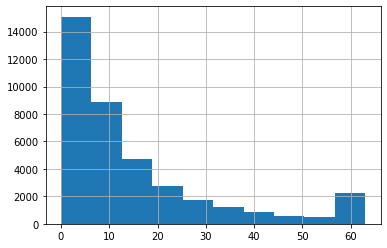

In [142]:
data.loc[data['CROWFLY'] > 63, 'CROWFLY'] = 63
data['CROWFLY'].hist()

<AxesSubplot:>

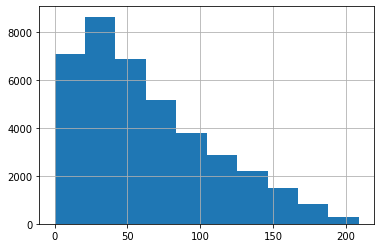

In [143]:
data['DX_LASTCONTACT_DEATH_MONTHS'].hist()

In [144]:
data['DX_LASTCONTACT_DEATH_MONTHS'].describe()

count    39331.000000
mean        63.596507
std         45.536624
min          0.000000
25%         27.430000
50%         53.160000
75%         91.960000
max        208.790000
Name: DX_LASTCONTACT_DEATH_MONTHS, dtype: float64

In [145]:
data['2yr_mortality'] = np.NaN
data.loc[((data['DX_LASTCONTACT_DEATH_MONTHS'] >= 24) & (data['PUF_VITAL_STATUS'] == 1)), '2yr_mortality'] = 0
data.loc[((data['DX_LASTCONTACT_DEATH_MONTHS'] >= 24) & (data['PUF_VITAL_STATUS'] == 0)), '2yr_mortality'] = 0
data.loc[((data['DX_LASTCONTACT_DEATH_MONTHS'] < 24) & (data['PUF_VITAL_STATUS'] == 0)), '2yr_mortality'] = 1
data['2yr_mortality'].value_counts(dropna=False)

0.0    30999
1.0     6121
NaN     5930
Name: 2yr_mortality, dtype: int64

In [146]:
data['3yr_mortality'] = np.NaN
data.loc[((data['DX_LASTCONTACT_DEATH_MONTHS'] >= 36) & (data['PUF_VITAL_STATUS'] == 1)), '3yr_mortality'] = 0
data.loc[((data['DX_LASTCONTACT_DEATH_MONTHS'] >= 36) & (data['PUF_VITAL_STATUS'] == 0)), '3yr_mortality'] = 0
data.loc[((data['DX_LASTCONTACT_DEATH_MONTHS'] < 36) & (data['PUF_VITAL_STATUS'] == 0)), '3yr_mortality'] = 1
data['3yr_mortality'].value_counts(dropna=False)

0.0    25804
NaN     9216
1.0     8030
Name: 3yr_mortality, dtype: int64

In [147]:
data['5yr_mortality'] = np.NaN
data.loc[((data['DX_LASTCONTACT_DEATH_MONTHS'] >= 60) & (data['PUF_VITAL_STATUS'] == 1)), '5yr_mortality'] = 0
data.loc[((data['DX_LASTCONTACT_DEATH_MONTHS'] >= 60) & (data['PUF_VITAL_STATUS'] == 0)), '5yr_mortality'] = 0
data.loc[((data['DX_LASTCONTACT_DEATH_MONTHS'] < 60) & (data['PUF_VITAL_STATUS'] == 0)), '5yr_mortality'] = 1
data['5yr_mortality'].value_counts(dropna=False)

0.0    17519
NaN    15270
1.0    10261
Name: 5yr_mortality, dtype: int64

In [148]:
data['YEAR_OF_DIAGNOSIS'].value_counts(dropna=False)

2018    3765
2019    3714
2016    3537
2017    3532
2015    3206
2014    3205
2013    2993
2012    2736
2011    2547
2009    2397
2010    2339
2008    2197
2007    1907
2006    1724
2004    1632
2005    1619
Name: YEAR_OF_DIAGNOSIS, dtype: int64

In [149]:
# mortality_df = {}
# for year in ['2', '3', '5']:
#     pd.DataFrame(data.groupby('YEAR_OF_DIAGNOSIS')['{}yr_mortality'.format(year)].value_counts(normalize=False)).to_csv('data/{}_yr_mortality_counts.csv'.format(year))

In [150]:
pd.crosstab(data['YEAR_OF_DIAGNOSIS'], data['2yr_mortality'], normalize='index')

2yr_mortality,0.0,1.0
YEAR_OF_DIAGNOSIS,,
2004,0.788071,0.211929
2005,0.798223,0.201777
2006,0.819362,0.180638
2007,0.831383,0.168617
2008,0.825185,0.174815
2009,0.825255,0.174745
2010,0.839791,0.160209
2011,0.841136,0.158864
2012,0.840790,0.159210


In [151]:
pd.crosstab(data['YEAR_OF_DIAGNOSIS'], data['3yr_mortality'], normalize='index')

3yr_mortality,0.0,1.0
YEAR_OF_DIAGNOSIS,,
2004,0.730351,0.269649
2005,0.736607,0.263393
2006,0.763268,0.236732
2007,0.766310,0.233690
2008,0.768622,0.231378
2009,0.766667,0.233333
2010,0.777339,0.222661
2011,0.784959,0.215041
2012,0.785146,0.214854


In [152]:
pd.crosstab(data['YEAR_OF_DIAGNOSIS'], data['5yr_mortality'], normalize='index')

5yr_mortality,0.0,1.0
YEAR_OF_DIAGNOSIS,,
2004,0.648316,0.351684
2005,0.654994,0.345006
2006,0.680073,0.319927
2007,0.678748,0.321252
2008,0.685769,0.314231
2009,0.693122,0.306878
2010,0.692654,0.307346
2011,0.688476,0.311524
2012,0.699642,0.300358


In [157]:
km_cols = ['DX_LASTCONTACT_DEATH_MONTHS', 'PUF_VITAL_STATUS']
data_km = data[km_cols]
data_km.head()

,DX_LASTCONTACT_DEATH_MONTHS,PUF_VITAL_STATUS
PUF_CASE_ID,,
D66f458f9-bdc0-4c95-94a3-a5f8c5bb74f9,48.82,1.0
Dfc68ea23-71aa-4b0d-87c0-587b4ce13d04,65.64,0.0
D54a1d0da-4328-4ca5-8481-87cd73b33dd4,67.48,1.0
D62170955-5fc5-434e-8e6a-6a9e139851c4,37.19,1.0
D2cfdabba-8277-463e-bf64-7c3139b45372,15.47,1.0


In [158]:
data_km.to_csv('data/data_km.csv', index_label='PUF_CASE_ID')

In [70]:
data.drop(columns=['DX_LASTCONTACT_DEATH_MONTHS', 'PUF_VITAL_STATUS', '2yr_mortality', '5yr_mortality'], inplace=True)

In [71]:
before = data.shape[0]
data.dropna(subset=['3yr_mortality'], inplace=True)
after = data.shape[0]
drop = before - after

drop_counts = drop_counts.append({'criteria': '3yr f/u', 'before': before, 'after': after, 'drop': drop, '% APR': table(data, 'APR')['percent'][1]}, ignore_index=True)
drop_counts.head(20)

,criteria,before,after,drop,% APR
0,total,0,80128,0,0.116033
1,histology,80128,70610,9518,0.063928
2,no radiation,70610,51796,18814,0.039923
3,stage IV,51796,49284,2512,0.040543
4,stage 0,49284,48640,644,0.040459
5,stage missing,48640,43050,5590,0.032337
6,3yr f/u,43050,33834,9216,0.034824


In [72]:
data.dropna(subset=['3yr_mortality'], inplace=True)

In [73]:
data['APR'].value_counts(dropna=False)

0.0    23531
NaN     9454
1.0      849
Name: APR, dtype: int64

In [74]:
data['APR'].value_counts(normalize=True)

0.0    0.965176
1.0    0.034824
Name: APR, dtype: float64

In [75]:
data['APR'].fillna('missing', inplace=True)
data['APR'].value_counts()

0.0        23531
missing     9454
1.0          849
Name: APR, dtype: int64

In [76]:
pd.crosstab(data['APR'], data['3yr_mortality'], normalize='index')

3yr_mortality,0.0,1.0
APR,,
0.0,0.763376,0.236624
1.0,0.521790,0.478210
missing,0.782526,0.217474


In [77]:
data['YEAR_OF_DIAGNOSIS'].value_counts(dropna=False)

2016    3177
2014    3061
2015    2979
2013    2902
2012    2639
2011    2460
2017    2409
2009    2310
2010    2277
2008    2148
2007    1870
2006    1677
2005    1568
2004    1565
2018     792
Name: YEAR_OF_DIAGNOSIS, dtype: int64

In [78]:
# data = data[data['YEAR_OF_DIAGNOSIS'] != 2017]
# data = data[data['YEAR_OF_DIAGNOSIS'] != 2018]

In [79]:
data.shape

(33834, 35)

In [80]:
#find the columns with the greatest proportion of missing values
missing_values = data.isnull().sum()
pd.DataFrame(missing_values.sort_values(ascending=False)).head(20)


,0
SURG_DISCHARGE_DAYS,27036
TOTAL_DOSE,21238
LYMPH_VASCULAR_INVASION,11138
RAD_ELAPSED_RX_DAYS,10053
TUMOR_SIZE,9103
p_stage,7133
MED_INC_QUAR_2016,3619
NO_HSD_QUAR_2016,3568
CROWFLY,3249
FACILITY_LOCATION_CD,985


In [81]:
data['APR'].value_counts(dropna=False)

0.0        23531
missing     9454
1.0          849
Name: APR, dtype: int64

In [82]:
data_na = data[data['APR'].isnull()]
data_na['3yr_mortality'].value_counts(dropna=False)

Series([], Name: 3yr_mortality, dtype: int64)

In [83]:
data.to_csv('data/data_os_table1.csv', index=True, index_label='PUF_CASE_ID')